In [1]:
import pandas as pd
import numpy as np
import struct
import codecs
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
max_length = 100
FEATURES_TINY = "data/phase/ml_features_tiny.csv"
FEATURES = "data/phase/ml_features.csv"
WAVEFORMS_TINY = "data/phase/ml_waveforms_tiny.csv.2"
WAVEFORMS = "data/phase/ml_waveforms.csv"
STA = "URZ"

In [3]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)



Python version 3.5.3 (default, Jan 21 2017, 15:44:58) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
Pandas version 0.20.2
Matplotlib version 2.0.0


In [4]:
dff = pd.read_csv(filepath_or_buffer=FEATURES)
dff.head()

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
0,1582602,LPAZ,9.482724e+08,Lg,regS,Lg,regS,0.000000,A,0.666667,...,1.815760,0.281515,4.312000,0.0,-0.360000,0.672331,2.462823,1.196801,1.564852,0.810008
1,3392748,LPAZ,9.660487e+08,Sn,regS,Lg,regS,2.250001,A,0.333333,...,3.318087,5.777322,3.312782,0.0,0.000000,0.771338,0.658481,2.513435,3.555231,1.341278
2,4251736,LPAZ,9.755992e+08,Lg,regS,Lg,regS,0.549998,A,0.289855,...,5.006600,3.991400,1.593971,-0.1,-0.215000,1.842368,6.353942,0.422784,1.290310,1.712811
3,5843204,LPAZ,9.915611e+08,Lg,regS,Sn,regS,2.170612,A,0.571429,...,2.034370,4.254982,4.254982,0.0,0.000000,1.255465,2.631712,1.016241,2.840468,9.503727
4,6033158,LPAZ,9.934632e+08,Sn,regS,Sn,regS,2.549999,A,0.166667,...,1.822586,1.937456,4.009178,-0.3,-0.453333,0.410712,1.057677,0.842994,1.624028,1.184967


In [5]:
dfw = pd.read_csv(filepath_or_buffer=WAVEFORMS_TINY)
dfw.head()

,WAVEFORMID,ARID,STA,CHAN,SAMPRATE,STARTTIME,ENDTIME,NSAMP,CALIB,SAMPLES
0,1251350,13510282,URZ,BHZ,40,1.058701e+09,1.058701e+09,400,0.0372,e336b841a470c1412a3aaa410c938b41857c5441b51523...
1,1251351,13510282,URZ,BHN,40,1.058701e+09,1.058701e+09,400,0.0372,96e19ec38e069ec379189dc3afd49bc332d799c3a62a98...
2,1220995,14754673,URZ,BHE,40,1.068339e+09,1.068339e+09,400,0.0379,4f40e8c2d4abe0c2aac0eac2a61bf7c20dd1f0c2cb30cd...
3,1220996,14754673,URZ,BHZ,40,1.068339e+09,1.068339e+09,400,0.0372,a01a0ec2d50990c1e02db0c144fa23c2ce884ec288855c...
4,1221366,16048768,URZ,BHN,40,1.077887e+09,1.077887e+09,400,0.0372,750281c2b30c78c29d8071c258a86ac207f066c23e7962...


In [7]:
sample=dfw[dfw.WAVEFORMID==1687]["SAMPLES"]
print(len(sample.values[0]))

3200


In [8]:
dff[dff.ARID==13510282]["CLASS_PHASE"].values[0]

'regS'

In [9]:
dfw[dfw.ARID==125801379]

,WAVEFORMID,ARID,STA,CHAN,SAMPRATE,STARTTIME,ENDTIME,NSAMP,CALIB,SAMPLES
1000,1687,125801379,LPAZ,BHE,40,1.503905e+09,1.503905e+09,400,0.02067,376c8044550a7444f73c644422935c44bc6f4e446ece2c...
1001,1688,125801379,LPAZ,BHZ,40,1.503905e+09,1.503905e+09,400,0.02062,bba1bcc3e758f8c3814b23c4d8fc3fc4ecdb43c4e7e837...
1002,1689,125801379,LPAZ,BHN,40,1.503905e+09,1.503905e+09,400,0.02057,3c2b6ac3b168a7c3a74fe2c3e9dc0ac451e018c4d9a91b...


In [10]:
dff[dff.ARID==28541585]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
428671,28541585,URZ,1.143123e+09,P,tele,P,tele,0.55,A,0.666667,...,1.702892,0.042081,0.042081,0.0,0.0,0.467387,0.594238,0.057473,0.053682,0.463873


In [11]:
dfw.dtypes

WAVEFORMID      int64
ARID            int64
STA            object
CHAN           object
SAMPRATE        int64
STARTTIME     float64
ENDTIME       float64
NSAMP           int64
CALIB         float64
SAMPLES        object
dtype: object

In [12]:
arid = list(dfw.groupby(["ARID"])["ARID"])
print(arid[0])

(13190127, 688    13190127
689    13190127
770    13190127
Name: ARID, dtype: int64)


In [13]:
def get_arrival_waveforms(dfw, arid, chan=None):
    #returns waveforms for all three channels for a given arrival

    rows = (dfw.ARID == arid)
    if chan:
        rows & (df.CHAN == chan)
    data = dfw[rows].values

    print('Fetched %d waveforms' % len(data))

    ret = []

    for dat in data:
        dat = list(dat)
        nsamp = dat[7]
        waveform = np.array(struct.unpack('%sf' % nsamp, codecs.decode(dat[9], 'hex_codec')))
        dat[9] = waveform
        # print(dat)
        ret.append(dat)

    return ret

In [14]:
def test_extraction(dff, dfw, arid):
    """just a test..."""
    data = get_arrival_waveforms(dfw, arid, chan=None)

    nchan = len(data)
    fig = plt.figure()
    for fi, dat in enumerate(data):
        ax = fig.add_subplot(nchan, 1, fi + 1)
        ax.plot(dat[9])
        ax.set_ylabel('%s %s' % (dat[2], dat[3]))
        if fi==0:
            phase = dff[dff.ARID==arid]["CLASS_PHASE"].values[0]
            ax.set_title('ARID: %d, phase: %s, arrival: (time %3.3f-%3.3f)' % (dat[1], phase, dat[5],dat[6]))
    plt.show()

Fetched 3 waveforms


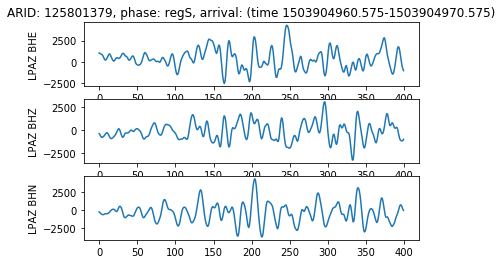

In [15]:
test_extraction(dff, dfw, 125801379)

Fetched 3 waveforms


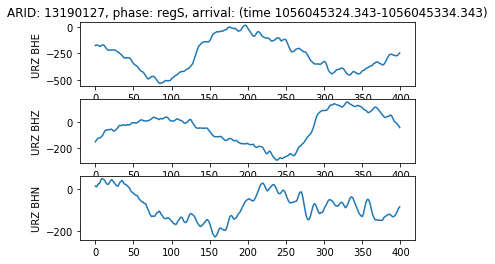

Fetched 3 waveforms


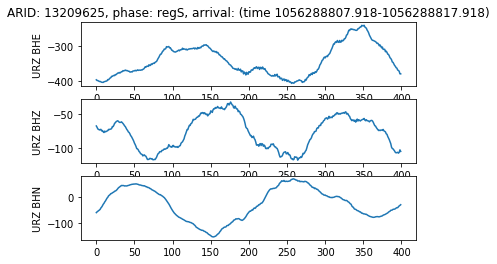

Fetched 3 waveforms


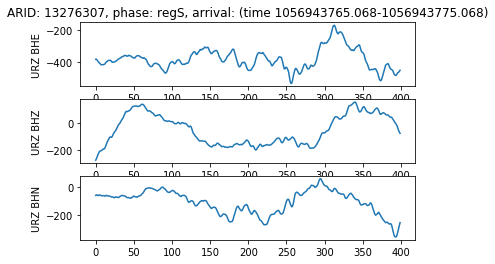

Fetched 3 waveforms


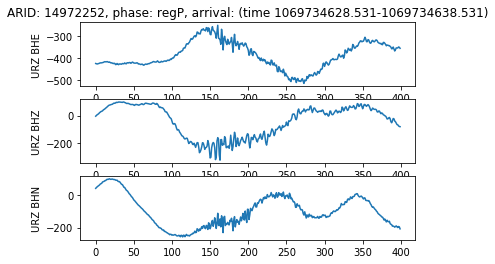

Fetched 3 waveforms


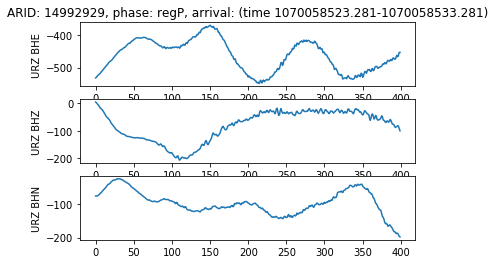

Fetched 3 waveforms


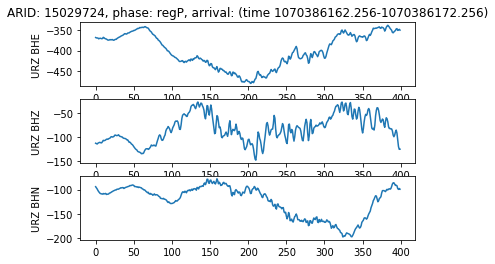

Fetched 3 waveforms


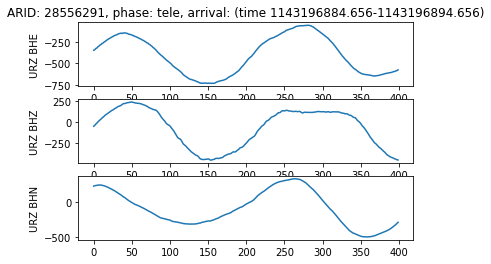

Fetched 3 waveforms


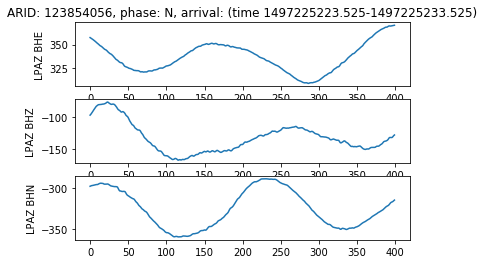

In [19]:
# test_extraction(df, 14754673)
# test_extraction(df, 16206751)
# for arid in [28541585,15029724,14992929,14972252,28556291,28557837,28559193,13097443,13097727,13097728,13097729,13097946]:
phase_counter = {}
for arid in sorted(list(set(dfw.ARID))):
    dff_current = dff[dff.ARID==arid]
    if len(dff_current) > 0:
        phase = dff[dff.ARID==arid]["CLASS_PHASE"].values[0]
        if phase not in phase_counter:
            phase_counter[phase] = 1
        else:
            phase_counter[phase] += 1
        # print("{}:{}".format(arid, phase))
        if phase_counter[phase] <= 3:
            test_extraction(dff, dfw, arid)

In [165]:
x = dff[dff.ARID==116755250]
print(len(x))

0


In [86]:
sorted(list(set(df.ARID)))[:2]

[13190127, 13209625]

In [16]:
dff[(dff.STA == "URZ") & (dff.CLASS_PHASE == "regP")][1000:1010]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
418432,69639712,URZ,1.310148e+09,Pn,regP,Pn,regP,0.32500,A,0.166667,...,1.526034,0.049635,0.075242,0.0,0.000000,0.592929,0.550145,0.449538,1.236630,0.119959
418433,69651250,URZ,1.310189e+09,Pn,regP,Pn,regP,3.44999,A,0.166667,...,1.102226,0.058988,0.064236,0.3,0.336667,2.021497,0.469324,0.688354,0.350253,0.071304
418434,69654399,URZ,1.310200e+09,Pn,regP,Pn,regP,0.00000,A,0.166667,...,1.545706,0.060855,0.063311,0.1,0.190000,0.960809,0.241442,0.281890,0.484942,0.170457
418435,69659741,URZ,1.310216e+09,Pn,regP,Pn,regP,2.07500,A,0.166667,...,2.313854,0.087496,0.087496,0.2,0.205000,0.476854,1.159328,0.493377,0.134886,0.179387
418436,69662881,URZ,1.310222e+09,Pn,regP,Pn,regP,0.00000,A,0.444444,...,2.817011,0.098782,0.099715,0.3,0.363333,0.550186,0.128019,0.359782,0.202776,0.116407
418437,79343290,URZ,1.343906e+09,Pn,regP,Pn,regP,1.00000,A,0.333333,...,3.316736,0.115084,0.282349,0.1,0.470000,0.837231,0.264252,0.298259,0.707707,0.087427
418438,79343890,URZ,1.343908e+09,Pn,regP,Pn,regP,0.00000,A,0.166667,...,1.688473,0.084972,0.084972,0.1,0.290000,1.748699,0.655791,0.263853,0.189875,0.040574
418439,79343892,URZ,1.343908e+09,Pn,regP,Pn,regP,0.00000,A,0.166667,...,2.427071,0.037418,0.070576,0.1,0.290000,2.128624,0.278531,1.129007,0.230905,0.059788
418440,79344790,URZ,1.343911e+09,Pn,regP,Pn,regP,0.00000,A,0.166667,...,2.156442,0.068549,0.068549,-0.1,0.085000,1.769950,1.231747,1.350045,0.517500,0.069518
418441,79345459,URZ,1.343912e+09,Pn,regP,Pn,regP,0.25000,A,0.166667,...,1.800293,0.020195,0.058632,0.2,0.405000,3.463053,0.714481,0.850711,0.612621,0.078769


In [151]:
dff[(dff.STA == "URZ") & (dff.CLASS_PHASE == "regS")][1000:1010]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
407064,21757489,URZ,1.109580e+09,Sx,regS,Sn,regS,0.00000,A,0.166667,...,1.871275,4.176428,3.190145,0.0,0.000000,1.108969,0.800936,0.735662,4.296639,1.406138
407065,21757609,URZ,1.109582e+09,Sx,regS,Sn,regS,3.50000,A,0.333333,...,1.738583,3.274452,2.325191,0.0,0.000000,0.199384,1.334895,2.824965,1.998849,1.893982
407066,21791698,URZ,1.109750e+09,Lg,regS,Sn,regS,2.65000,A,0.333333,...,2.026292,5.406460,5.406460,-0.3,-0.333333,1.794309,0.688012,0.837908,1.221421,1.802326
407067,21818982,URZ,1.109881e+09,Sx,regS,Sn,regS,3.65000,A,0.444444,...,2.201612,7.692400,7.692400,0.0,0.000000,1.652429,0.465714,0.947237,6.936772,2.512703
407068,21883545,URZ,1.110219e+09,Lg,regS,Sn,regS,3.15000,A,0.444444,...,2.039444,3.119843,3.201842,-0.3,-0.430000,3.845110,1.085444,1.045858,1.461858,1.598830
407069,21888888,URZ,1.110244e+09,Lg,regS,Sn,regS,1.85000,A,0.166667,...,2.906794,8.434604,2.257059,-0.1,-0.500000,2.137820,0.427856,1.328536,2.046707,1.106508
407070,21891154,URZ,1.110253e+09,Lg,regS,Sn,regS,0.82500,A,0.333333,...,5.286681,2.279313,1.902342,-0.3,-0.330000,0.197666,0.990381,1.297073,3.600470,1.014127
407071,21891257,URZ,1.110254e+09,Sx,regS,Sn,regS,1.85000,A,1.000000,...,3.050411,12.807700,12.807700,-0.1,-0.310000,1.502210,1.241857,1.701396,5.733481,4.062771
407072,21913062,URZ,1.110373e+09,Sx,regS,Sn,regS,1.35000,A,0.333333,...,2.619899,8.162034,8.162034,0.0,0.000000,1.596771,0.860893,0.535556,2.054538,3.655737
407073,21965223,URZ,1.110642e+09,Sn,regS,Sn,regS,1.12501,A,0.166667,...,2.519483,2.156367,1.843690,-0.1,-0.470000,0.301737,0.562354,0.858989,1.206055,1.063103


In [17]:
dff[(dff.STA == "URZ") & (dff.CLASS_PHASE == "tele")][1000:1010]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
429721,17847110,URZ,1.088479e+09,P,tele,ScP,tele,1.475,A,0.666667,...,1.279721,0.147827,0.147827,0.0,0.00,1.057073,0.620372,0.268578,0.294498,0.543717
429722,17865383,URZ,1.088504e+09,P,tele,P,tele,1.950,A,0.444444,...,2.157383,0.326157,0.299824,0.1,0.06,2.024344,0.813517,0.626667,0.359617,0.081755
429723,17869741,URZ,1.088614e+09,P,tele,P,tele,3.675,A,0.444444,...,2.618260,0.393179,0.393179,0.1,0.17,6.317434,0.676517,0.343128,0.216934,0.658257
429724,17882675,URZ,1.088678e+09,P,tele,P,tele,2.375,A,1.000000,...,2.592226,0.408676,0.386368,0.0,0.00,0.690554,0.193325,0.519893,0.340352,0.314959
429725,17903401,URZ,1.088699e+09,P,tele,P,tele,0.625,A,0.666667,...,1.632891,0.053931,0.052534,0.0,0.00,1.721106,0.077429,0.218032,0.093972,0.024113
429726,17888399,URZ,1.088703e+09,P,tele,P,tele,1.825,A,0.444444,...,1.235892,0.127121,0.155146,0.1,0.15,6.953590,0.897510,0.214218,0.121235,0.176059
429727,17906048,URZ,1.088809e+09,P,tele,P,tele,1.675,A,0.444444,...,2.481889,0.271969,0.541156,0.1,0.06,0.354074,0.622593,0.452060,0.322867,0.137726
429728,17910858,URZ,1.088843e+09,P,tele,P,tele,1.025,A,0.333333,...,1.356425,0.241889,0.609098,0.0,0.00,2.044247,1.317808,0.564071,0.260548,0.051747
429729,17916254,URZ,1.088880e+09,P,tele,P,tele,1.050,A,0.333333,...,1.387322,0.103844,0.155630,0.1,0.12,6.349502,0.714558,0.533839,0.117915,0.113273
429730,17917512,URZ,1.088888e+09,P,tele,P,tele,0.925,A,0.444444,...,2.232919,0.246030,0.246030,0.0,0.00,1.001267,0.202380,0.469572,0.065177,0.062981


In [18]:
dff[(dff.STA == "URZ") & (dff.CLASS_PHASE == "N")][1000:1010]

,ARID,STA,TIME,IPHASE,CLASS_IPHASE,PHASE,CLASS_PHASE,RETIME,SOURCE,PER,...,HMXMN,HVRATP,HVRAT,NAB,TAB,HTOV1,HTOV2,HTOV3,HTOV4,HTOV5
467364,13386203,URZ,1.058044e+09,N,N,NaN,N,0.0,A,0.666667,...,2.664121,1.392459,0.428289,-0.1,0.055,1.299575,0.801621,1.104282,0.405854,0.222322
467365,13386207,URZ,1.058044e+09,N,N,NaN,N,0.0,A,1.000000,...,2.198039,1.448718,0.950803,-0.1,-0.300,1.187677,0.444454,1.216021,0.969069,0.792834
467366,13386208,URZ,1.058044e+09,N,N,NaN,N,0.0,A,0.166667,...,1.243447,2.172864,2.301484,0.0,0.000,0.408087,0.620239,1.106391,0.867933,0.440849
467367,13386385,URZ,1.058045e+09,N,N,NaN,N,0.0,A,1.000000,...,2.253628,0.134693,0.134693,0.0,0.000,0.199438,0.336542,0.422349,0.620079,0.607270
467368,13386387,URZ,1.058046e+09,N,N,NaN,N,0.0,A,1.000000,...,3.353795,0.617954,0.922999,0.0,0.000,0.613477,0.449295,0.831439,0.706226,0.251795
467369,13386492,URZ,1.058047e+09,N,N,NaN,N,0.0,A,0.333333,...,3.297510,0.369298,0.470096,0.0,0.000,2.878009,0.866541,0.994514,0.497787,0.257856
467783,13388475,URZ,1.058047e+09,N,N,NaN,N,0.0,A,0.333333,...,2.921810,0.219865,0.360007,0.0,0.000,2.015287,1.095239,0.491384,0.282312,0.210563
467784,13386561,URZ,1.058048e+09,N,N,NaN,N,0.0,A,0.666667,...,1.441922,0.613924,0.613924,0.0,0.410,0.804195,0.514569,0.889699,0.640101,0.274068
467785,13388156,URZ,1.058059e+09,N,N,NaN,N,0.0,A,0.333333,...,2.437077,2.756963,3.207419,0.0,0.000,0.329344,0.322689,0.918091,2.618072,0.654276
467786,13389262,URZ,1.058069e+09,N,N,NaN,N,0.0,A,0.333333,...,2.129684,0.468094,0.986887,0.0,0.000,0.271893,0.827343,0.470638,0.510870,0.373644
